In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160615)
tf.set_random_seed(20160615)

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def generate_detablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_detablock(30,[-7,-7],18,1)
df1 = generate_detablock(30,[-7,7],18,0)
df2 = generate_detablock(30,[7,-7],18,0)
df3 = generate_detablock(30,[7,7],18,1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)


In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])

In [4]:
num_units1 = 2
num_units2 = 2

x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units1]))
b1 = tf.Variable(tf.zeros([num_units1]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden2, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None,1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i = 0
for _ in range(2000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('step: %d, loss: %f, accuracy: %f' % (i, loss_val, acc_val))

step: 100, loss: 83.176933, accuracy: 0.508333
step: 200, loss: 83.176178, accuracy: 0.508333
step: 300, loss: 83.174591, accuracy: 0.508333
step: 400, loss: 83.171082, accuracy: 0.500000
step: 500, loss: 83.162636, accuracy: 0.508333
step: 600, loss: 83.140877, accuracy: 0.516667
step: 700, loss: 83.075996, accuracy: 0.541667
step: 800, loss: 82.822495, accuracy: 0.541667
step: 900, loss: 81.475693, accuracy: 0.625000
step: 1000, loss: 75.140419, accuracy: 0.658333
step: 1100, loss: 59.051060, accuracy: 0.866667
step: 1200, loss: 46.646378, accuracy: 0.900000
step: 1300, loss: 41.770844, accuracy: 0.900000
step: 1400, loss: 39.639244, accuracy: 0.900000
step: 1500, loss: 38.510742, accuracy: 0.900000
step: 1600, loss: 37.788445, accuracy: 0.900000
step: 1700, loss: 37.159111, accuracy: 0.900000
step: 1800, loss: 36.648502, accuracy: 0.900000
step: 1900, loss: 36.529396, accuracy: 0.891667
step: 2000, loss: 36.352604, accuracy: 0.891667


In [12]:
train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(train_set1.x1,train_set1.x2, marker='x')
subplot.scatter(train_set0.x1,train_set0.x2, marker='o')

locations = [] 
for x2 in np.linspace(-15, 15, 100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15), cmap=plt.cm.gray_r, alpha=0.5)

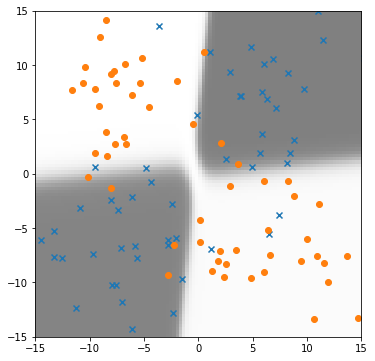

In [13]:
fig